In [31]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import pandas as pd
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# seed 값 설정

In [2]:
seed = 42

np.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 입력

In [4]:
pd.read_csv('/content/drive/MyDrive/Colab Notebooks/02_DeepLearning/dataset/wine.csv', header=None).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [14]:
df_pre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/02_DeepLearning/dataset/wine.csv', header=None)

In [15]:
df = df_pre.sample(frac=1)  # frac=1 100% 사용

In [16]:
df_pre.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [17]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
3389,9.4,0.16,0.30,1.4,0.042,26.0,176.0,0.99540,3.15,0.46,9.1,5,0
4550,7.2,0.20,0.22,1.6,0.044,17.0,101.0,0.99471,3.37,0.53,10.0,5,0
4442,5.9,0.22,0.38,1.3,0.046,24.0,90.0,0.99232,3.20,0.47,10.0,6,0
5959,7.3,0.28,0.35,1.6,0.054,31.0,148.0,0.99178,3.18,0.47,10.7,5,0
5923,5.9,0.20,0.28,1.0,0.043,45.0,100.0,0.99033,3.40,0.41,11.4,6,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 3389 to 1482
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [20]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [21]:
df.values

array([[ 9.4 ,  0.16,  0.3 , ...,  9.1 ,  5.  ,  0.  ],
       [ 7.2 ,  0.2 ,  0.22, ..., 10.  ,  5.  ,  0.  ],
       [ 5.9 ,  0.22,  0.38, ..., 10.  ,  6.  ,  0.  ],
       ...,
       [ 9.6 ,  0.6 ,  0.5 , ...,  9.7 ,  5.  ,  1.  ],
       [ 5.9 ,  0.48,  0.3 , ..., 11.9 ,  7.  ,  0.  ],
       [ 7.2 ,  0.58,  0.54, ..., 10.3 ,  4.  ,  1.  ]])

In [22]:
dataset = df.values

x = dataset[:, :-1]
y = dataset[:, -1]

In [24]:
x, x.shape, y, y.shape

(array([[ 9.4 ,  0.16,  0.3 , ...,  0.46,  9.1 ,  5.  ],
        [ 7.2 ,  0.2 ,  0.22, ...,  0.53, 10.  ,  5.  ],
        [ 5.9 ,  0.22,  0.38, ...,  0.47, 10.  ,  6.  ],
        ...,
        [ 9.6 ,  0.6 ,  0.5 , ...,  0.57,  9.7 ,  5.  ],
        [ 5.9 ,  0.48,  0.3 , ...,  0.42, 11.9 ,  7.  ],
        [ 7.2 ,  0.58,  0.54, ...,  0.57, 10.3 ,  4.  ]]),
 (6497, 12),
 array([0., 0., 0., ..., 1., 0., 1.]),
 (6497,))

# 모델 설정

In [25]:
model = Sequential()
model.add(Dense(30, input_dim=12, activation='relu'))
# h1 만 나오는 코드 : input_dim=12, 활성화함수 relu
model.add(Dense(12, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # 이진분류(sigmoid)

# 모델 컴파일 (환경설정)

In [26]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행 (학습)

In [32]:
# model.fit(x,y, epochs=200, batch_size=200)  # 200번 반복, 200개 묶음으로 반복해서 연습

Epoch 1/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0410 - accuracy: 0.9883
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0404 - accuracy: 0.9886
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0431 - accuracy: 0.9872
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0468 - accuracy: 0.9865
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9860
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0391 - accuracy: 0.9891
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0436 - accuracy: 0.9872
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0405 - accuracy: 0.9878
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0403 - accuracy: 0.9888
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss: 0.0418 - accuracy: 0.9872
Epoch 11/

KeyboardInterrupt: ignored

# 결과출력

In [29]:
# print('\n Accuracy : %.4f'%(model.evaluate(x,y)[1]))

204/204 [==============================] - 0s 2ms/step - loss: 0.0384 - accuracy: 0.9898

 Accuracy : 0.9898


# 모델 저장 폴더 설정

In [33]:
pwd

'/content'

In [35]:
model_dir = './model/'
if not os.path.exists(model_dir):
  os.mkdir(model_dir)

# 모델 저장 조건 설정

In [37]:
model_path = './model/{epoch:02d}-{val_loss:.4f}.hdf5'   # 모델 저장 경로 설정
checkpointer = ModelCheckpoint(filepath=model_path, monitor='val_loss', verboss=1, save_best_only=True)

# 모델 실행 및 저장

In [40]:
model.fit(x, y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[checkpointer])

Epoch 1/200
26/26 [==============================] - 34s 1s/step - loss: 0.0391 - accuracy: 0.9875 - val_loss: 0.0452 - val_accuracy: 0.9877
Epoch 2/200
26/26 [==============================] - 0s 14ms/step - loss: 0.0372 - accuracy: 0.9898 - val_loss: 0.0452 - val_accuracy: 0.9892
Epoch 3/200
26/26 [==============================] - 0s 7ms/step - loss: 0.0411 - accuracy: 0.9850 - val_loss: 0.0484 - val_accuracy: 0.9869
Epoch 4/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0372 - accuracy: 0.9883 - val_loss: 0.0419 - val_accuracy: 0.9915
Epoch 5/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0365 - accuracy: 0.9890 - val_loss: 0.0420 - val_accuracy: 0.9900
Epoch 6/200
26/26 [==============================] - 0s 5ms/step - loss: 0.0368 - accuracy: 0.9886 - val_loss: 0.0435 - val_accuracy: 0.9892
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0349 - accuracy: 0.9890 - val_loss: 0.0426 - val_accuracy: 0.9892
Epoch 8/200


# ---

In [52]:
# 조기종료 설정
ealry_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [53]:
history = model.fit(x, y, validation_split=0.2, epochs=200, batch_size=200, verbose=1, callbacks=[[ealry_stopping_callback, checkpointer]])

Epoch 1/200
26/26 [==============================] - 0s 9ms/step - loss: 0.0221 - accuracy: 0.9938 - val_loss: 0.0357 - val_accuracy: 0.9908
Epoch 2/200
26/26 [==============================] - 0s 8ms/step - loss: 0.0219 - accuracy: 0.9933 - val_loss: 0.0464 - val_accuracy: 0.9869
Epoch 3/200
26/26 [==============================] - 0s 8ms/step - loss: 0.0265 - accuracy: 0.9910 - val_loss: 0.0364 - val_accuracy: 0.9908
Epoch 4/200
26/26 [==============================] - 0s 11ms/step - loss: 0.0246 - accuracy: 0.9927 - val_loss: 0.0364 - val_accuracy: 0.9908
Epoch 5/200
26/26 [==============================] - 0s 10ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0362 - val_accuracy: 0.9908
Epoch 6/200
26/26 [==============================] - 0s 6ms/step - loss: 0.0236 - accuracy: 0.9925 - val_loss: 0.0361 - val_accuracy: 0.9908
Epoch 7/200
26/26 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9923 - val_loss: 0.0342 - val_accuracy: 0.9908
Epoch 8/200

In [54]:
# y_vloss 변수 생성해서 validation set으로 측정한 실험결과 오차값 저장
y_vloss = history.history['val_loss']

# y_acc 변수 생성해서 validation set으로 측정한 실험결과 정확도 값 저장
y_acc = history.history['val_accuracy']

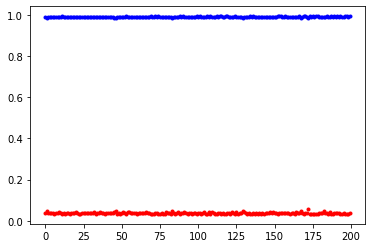

In [55]:
# x 값 지정 정확도는 파란색, 오차는 빨간색 표시

x_len = np.arange(len(y_acc))
plt.plot(x_len, y_vloss, 'o', c='r', markersize=3)
plt.plot(x_len, y_acc, 'o', c='b', markersize=3)
plt.show()